## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('Train.csv').values
X = dfx[1:, :-1]
Y = dfx[1:, -1]

In [3]:
print(X.shape)
print(Y.shape)

(1599, 5)
(1599,)


## Algorithm

In [26]:
x = np.ones((1599,6))
x[:,1:] = X[:,:]
print(x)

[[ 1.         -0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 1.          0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 [ 1.          0.17531181  0.14319424 -0.58111096 -0.12210693 -1.29216807]
 ...
 [ 1.          1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [ 1.         -1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [ 1.         -1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [62]:
def hypothesis(x,theta):
    a = 0                                         # calculating the hypothesis for an example
    for i in range(x.shape[0]):
        a += x[i]*theta[i]
    return a

def error(x,y,theta):                             # calculating total error
    n = x.shape[0]
    total_error = 0
    for i in range(n):
        hx = hypothesis(x[i],theta)
        total_error += (hx-y[i])**2
    return total_error*0.5

def gradient(x,y,theta):                          # Calculating Gradient
    n = x.shape[0]
    grad = np.zeros((x.shape[1], ))
    for i in range(n):
        hx = hypothesis(x[i],theta)
        for j in range(x.shape[1]):
            grad[j] += (hx - y[i])*x[i][j]
    return grad

def GradientDescent(x,y,learning_rate=0.001):
    theta = np.zeros(x.shape[1])
    i = 0
    e = []
    while i<=200 :
        grad = gradient(x,y,theta)
        theta = theta - grad*learning_rate
        e.append(error(x,y,theta))
        i +=1
        
    return theta,e



In [63]:
theta,err = GradientDescent(x,Y)

In [64]:
print(theta)

[ 5.00570781 29.68688965 92.64871058  8.2748588  44.77460154  2.52699597]


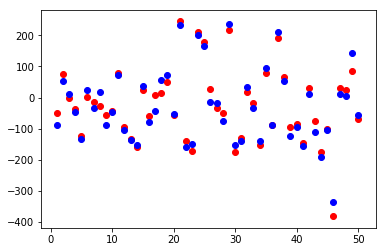

In [71]:
for i in range(50):                                   # plotting few target values and there predicted values
    plt.scatter(i+1,Y[i],color='red')
    plt.scatter(i+1,hypothesis(x[i],theta),color='blue')

plt.show()

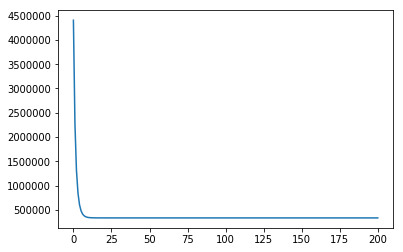

In [66]:
plt.plot(err) #plot of error function

In [174]:
Xt = pd.read_csv('Test.csv').values          #reading testing data
Xt = Xt[0: , : ]

In [175]:
print(Xt.shape)
print(Xt[0])

(400, 5)
[ 1.01525387  2.07620944 -0.26643482 -2.4180882  -0.98050279]


In [176]:
ones = np.ones((Xt.shape[0],6))
ones[: , 1:] = Xt[:,:]
Xt = ones

In [177]:
print(Xt.shape)
Yt = np.ones((Xt.shape[0], ))

(400, 6)


In [178]:
for i in range(Xt.shape[0]):
    Yt[i]= hypothesis(Xt[i],theta)

In [179]:
print(Yt.shape)

(400,)


In [180]:
print(Yt)

[ 1.14552192e+02  1.18010991e+02 -2.17503731e+01 -4.39600824e+01
 -9.58989744e+01 -4.45057637e+01 -7.55455856e+01  2.38035105e+01
  1.73828709e+02  1.72852724e+02 -1.05400419e+02 -2.07836326e+01
 -3.89308848e+00  1.22991427e+02  4.03381015e+01  4.57397570e+01
 -1.89593816e+02  2.26123956e+01  1.16284652e+01  1.36353448e+02
  6.49331565e+01 -6.19544544e+01 -1.08177587e+02 -7.40523328e+00
 -5.84805514e+01  1.19043876e+01  2.92674183e+01  1.07710133e+02
  2.41514630e+01 -2.60918023e+01  1.10997411e+02 -4.48431991e+01
  2.16814794e+02 -1.38452723e+01 -2.28559648e+02  1.54906310e+02
 -2.21056806e+00  1.27076265e+01 -3.08250738e+02  7.71323889e+01
 -8.11773554e+01 -2.06605738e+02 -2.38723852e+02  1.34762907e+02
 -7.36721674e+01  1.05467804e+02 -3.54692459e+00  2.06418101e+01
 -9.79970788e+01 -2.74930403e+01  1.08128778e+01 -1.74393974e+02
  6.51824057e+01 -9.77762199e+01 -1.06121389e+02 -1.55940625e+02
  6.25602308e+01  1.08623560e+02 -7.46148759e+01  4.17445533e+01
  4.12412533e+01 -5.07825

In [181]:
id = np.arange(399).reshape(399,1)

In [182]:
l = [int(i) for i in Yt]

In [183]:
df = pd.DataFrame(l)

In [184]:
print(df)

       0
0    114
1    118
2    -21
3    -43
4    -95
5    -44
6    -75
7     23
8    173
9    172
10  -105
11   -20
12    -3
13   122
14    40
15    45
16  -189
17    22
18    11
19   136
20    64
21   -61
22  -108
23    -7
24   -58
25    11
26    29
27   107
28    24
29   -26
..   ...
370 -137
371  -50
372  -93
373    8
374  -14
375  -62
376  -16
377 -172
378 -122
379   45
380  -37
381 -157
382   87
383    0
384  133
385  -47
386    2
387  174
388  170
389   46
390  -26
391   59
392  111
393  -36
394  -69
395  -81
396 -185
397  125
398   65
399   57

[400 rows x 1 columns]


In [185]:
df.to_csv('sol.csv',header='False',index='True')

In [186]:
print(int(-5.3))

-5
